In [1]:
from reservoirUtils import *
%load_ext autoreload
%autoreload 2

In [2]:
t = np.arange(20*1000)*0.001 #4 seconds at millisecond resolution
f = 1#Hz  
desiredOutput = 0.5*np.sin(2*np.pi*1*f*t) + 0.5*np.sin(2*np.pi*2*f*t)

reservoirs = {}
hyperparams = {'Ng' : 500, #no. neurons in each reservoir 
               'n' : 500, #no. reservoir neurons the output neuron is connected to 
               'p' : 0.1, #connection probability amongst recurrent units
               'tau' : 10, #neuron time constant, in ms 
               'dt' : 1, #simulation timestep in ms
               'g_GG' : 1.5, #RNN chaos parameters ( > 1 means chaos)
               'g_Gz' : 1, #feedback strength,
               'alpha' : 1, #learning rate
               'sigma' : 0,#amount of network noise
               'Nz' : 1, #no. of output neurons
               'Ni' : 26} #no. input neurons. Must be consistent with ther inputs passed 

g_GG_list = [0.5,1,1.5]
for (i,g_GG) in enumerate(g_GG_list):
    hyperparams['g_GG'] = g_GG
    reservoir = Reservoir(hyperparams)
    reservoirs[i] = []
    for _ in range(3*1000):
        reservoirs[i].append(reservoir.runDynamicsStep(returnItems=['z'])['z'])
    for j in range(14*1000):
        reservoirs[i].append(reservoir.runDynamicsStep(returnItems=['z'])['z'])
        reservoir.runTrainingStep(desiredOutput[j])
    for _ in range(3*1000):
        reservoirs[i].append(reservoir.runDynamicsStep(returnItems=['z'])['z'])

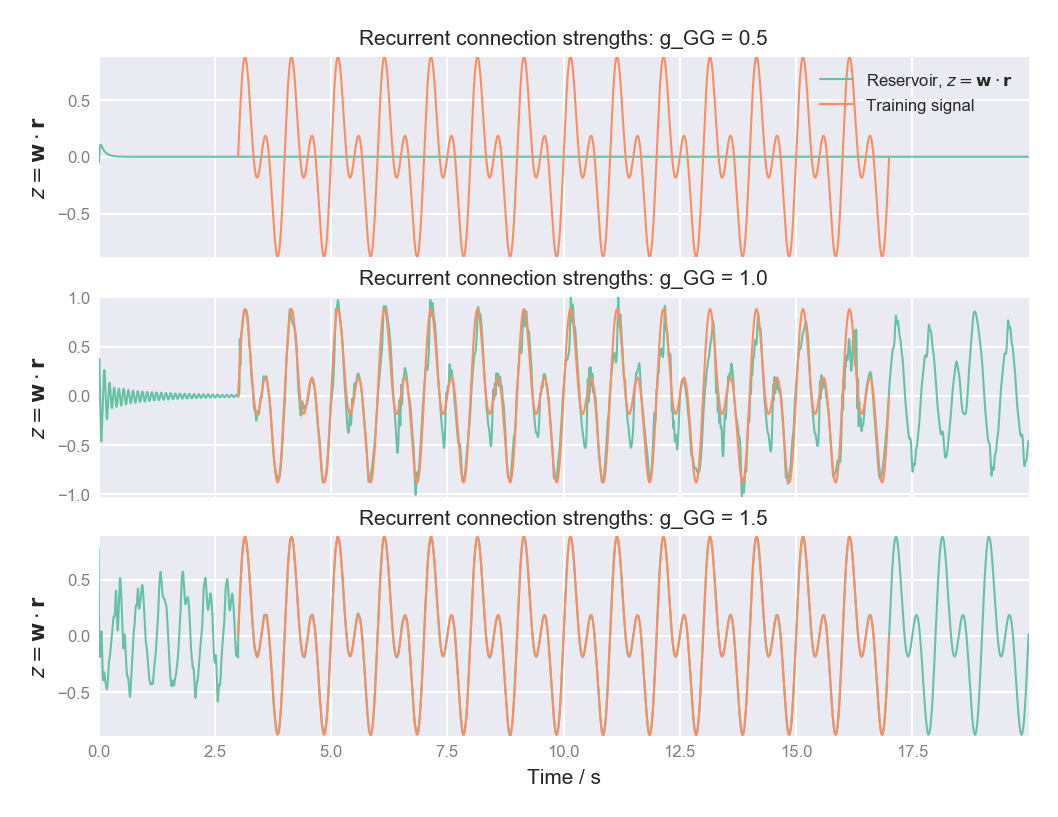

In [3]:
fig,ax = plt.subplots(3,1,figsize=(4,3), sharex=True)
for r in range(3):
    ax[r].plot(t,reservoirs[r],label=r'Reservoir, $z = \mathbf{w} \cdot \mathbf{r}$')
    ax[r].plot(t[3*1000:17*1000],desiredOutput[0*1000:14*1000],label='Training signal')
    if r == 2: 
        ax[r].set_xlabel('Time / s')
    if r == 0:   
        ax[r].legend()
    ax[r].set_ylabel(r'$z = \mathbf{w} \cdot \mathbf{r}$')
    ax[r].set_title("Recurrent connection strengths: g = %.1f" %g_GG_list[r] )